
# TP ANALYSE GÉOSPATIALE - MALARIA AU TCHAD


## INSTALLATION ET IMPORTATION DES BIBLIOTHÈQUES

In [4]:
!pip install geopandas matplotlib pandas fiona shapely

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

## Configuration de l'affichage

In [5]:
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("✓ Toutes les bibliothèques sont importées avec succès!")

✓ Toutes les bibliothèques sont importées avec succès!


## PARTIE 1: AFFICHAGE DES PROPRIÉTÉS

### 1.1 Chargement des données

In [ ]:
shapefile_path = "data/gadm41_TCD_shp 2/gadm41_TCD_shp/gadm41_TCD_1.shp"
# Pour les données de malaria (Excel ou CSV)
malaria_data_path = "data/Subnational Unit-data.csv"

# Chargement du shapefile
try:
    gdf_tchad = gpd.read_file(shapefile_path)
    print(f" Shapefile chargé avec succès!")
    print(f"  Fichier: {shapefile_path}\n")
except Exception as e:
    print(f" Erreur lors du chargement: {e}")
    print(" Vérifiez le chemin du fichier shapefile\n")
    # Création d'un exemple pour la démonstration
    gdf_tchad = None


✓ Shapefile chargé avec succès!
  Fichier: C:/Users/HP 840 G6/OneDrive/Desktop/ISEP_3/Analyse_Géo_Spatiale/Projet_2/gadm41_TCD_shp 2/gadm41_TCD_shp/gadm41_TCD_1.shp



### 1.2 Informations générales

In [7]:
if gdf_tchad is not None:
    print("--- INFORMATIONS GÉNÉRALES ---")
    print(f"Type de données: {type(gdf_tchad)}")
    print(f"Nombre d'entités (features): {len(gdf_tchad)}")
    print(f"Nombre de colonnes: {len(gdf_tchad.columns)}")
    print(f"\nNom des colonnes:")
    for i, col in enumerate(gdf_tchad.columns, 1):
        print(f"  {i}. {col}")

--- INFORMATIONS GÉNÉRALES ---
Type de données: <class 'geopandas.geodataframe.GeoDataFrame'>
Nombre d'entités (features): 23
Nombre de colonnes: 12

Nom des colonnes:
  1. GID_1
  2. GID_0
  3. COUNTRY
  4. NAME_1
  5. VARNAME_1
  6. NL_NAME_1
  7. TYPE_1
  8. ENGTYPE_1
  9. CC_1
  10. HASC_1
  11. ISO_1
  12. geometry


### 1.3 Système de projection (CRS)

In [8]:
print("\n--- SYSTÈME DE COORDONNÉES (CRS) ---")
if gdf_tchad.crs:
        print(f"CRS: {gdf_tchad.crs}")
        print(f"Type de projection: {gdf_tchad.crs.name}")
        print(f"Code EPSG: {gdf_tchad.crs.to_epsg()}")
else:
        print("⚠ Aucun système de coordonnées défini!")


--- SYSTÈME DE COORDONNÉES (CRS) ---
CRS: EPSG:4326
Type de projection: WGS 84
Code EPSG: 4326


### 1.4 Étendue géographique (Bounding Box)

In [9]:
print("\n--- ÉTENDUE GÉOGRAPHIQUE ---")
bounds = gdf_tchad.total_bounds
print(f"Longitude min: {bounds[0]:.4f}°")
print(f"Latitude min: {bounds[1]:.4f}°")
print(f"Longitude max: {bounds[2]:.4f}°")
print(f"Latitude max: {bounds[3]:.4f}°")
print(f"\nCentre approximatif:")
print(f"  Longitude: {(bounds[0] + bounds[2])/2:.4f}°")
print(f"  Latitude: {(bounds[1] + bounds[3])/2:.4f}°")


--- ÉTENDUE GÉOGRAPHIQUE ---
Longitude min: 13.4735°
Latitude min: 7.4411°
Longitude max: 24.0027°
Latitude max: 23.4504°

Centre approximatif:
  Longitude: 18.7381°
  Latitude: 15.4457°


### 1.5 Géométrie

In [10]:
print("\n--- INFORMATIONS SUR LA GÉOMÉTRIE ---")
print(f"Type de géométrie: {gdf_tchad.geometry.type.unique()}")
    
    # Calcul des superficies (en reprojettant si nécessaire)
if gdf_tchad.crs and gdf_tchad.crs.is_geographic:
        # Reprojection en mètres pour calcul précis des surfaces
        gdf_projected = gdf_tchad.to_crs('EPSG:32633')  # UTM Zone 33N pour le Tchad
        gdf_tchad['superficie_km2'] = gdf_projected.geometry.area / 1_000_000
        print("✓ Superficies calculées (reprojection en UTM)")
else:
        gdf_tchad['superficie_km2'] = gdf_tchad.geometry.area / 1_000_000
    
print(f"\nSuperficie totale: {gdf_tchad['superficie_km2'].sum():,.2f} km²")
print(f"Superficie moyenne par région: {gdf_tchad['superficie_km2'].mean():,.2f} km²")
    


--- INFORMATIONS SUR LA GÉOMÉTRIE ---
Type de géométrie: ['Polygon' 'MultiPolygon']
✓ Superficies calculées (reprojection en UTM)

Superficie totale: 1,275,882.24 km²
Superficie moyenne par région: 55,473.14 km²


### 1.6 Aperçu des données attributaires

In [11]:
print("\n--- APERÇU DES DONNÉES ATTRIBUTAIRES ---")
print("\nPremières lignes du tableau:")
print(gdf_tchad.head())
    
print("\n--- STATISTIQUES DESCRIPTIVES ---")
print(gdf_tchad.describe())
    
print("\n--- INFORMATIONS SUR LES VALEURS MANQUANTES ---")
missing = gdf_tchad.isnull().sum()
if missing.sum() > 0:
        print("Valeurs manquantes par colonne:")
        print(missing[missing > 0])
else:
     print("✓ Aucune valeur manquante détectée")


--- APERÇU DES DONNÉES ATTRIBUTAIRES ---

Premières lignes du tableau:
     GID_1 GID_0 COUNTRY          NAME_1 VARNAME_1 NL_NAME_1  TYPE_1  \
0  TCD.1_1   TCD    Chad  Barh el Ghazel        NA        NA  Région   
1  TCD.2_1   TCD    Chad           Batha        NA        NA  Région   
2  TCD.3_1   TCD    Chad          Borkou    Borkou        NA  Région   
3  TCD.4_1   TCD    Chad  Chari-Baguirmi        NA        NA  Région   
4  TCD.5_1   TCD    Chad      Ennedi Est        NA        NA  Région   

  ENGTYPE_1 CC_1 HASC_1  ISO_1  \
0    Region   NA  TD.BG     NA   
1    Region   NA  TD.BA     NA   
2    Region   NA  TD.BR     NA   
3    Region   NA  TD.CB  TD-CB   
4    Region   NA  TD.EE     NA   

                                            geometry  superficie_km2  
0  POLYGON ((17.23443 13.42971, 17.234 13.427, 17...    56336.525963  
1  POLYGON ((18.095 12.486, 18.065 12.452, 18.018...    90730.410026  
2  POLYGON ((18.051 15.476, 17.967 15.558, 17.9 1...   257024.445699  
3  POL

### Liste complète des régions

In [12]:
print("\n--- LISTE DES 23 RÉGIONS DU TCHAD ---")
for i, region in enumerate(sorted(gdf_tchad['NAME_1'].tolist()), 1):
    print(f"  {i:2d}. {region}")


--- LISTE DES 23 RÉGIONS DU TCHAD ---
   1. Barh el Ghazel
   2. Batha
   3. Borkou
   4. Chari-Baguirmi
   5. Ennedi Est
   6. Ennedi Ouest
   7. Guéra
   8. Hadjer-Lamis
   9. Kanem
  10. Lac
  11. Logone Occidental
  12. Logone Oriental
  13. Mandoul
  14. Mayo-Kebbi Est
  15. Mayo-Kebbi Ouest
  16. Moyen-Chari
  17. Ouaddaï
  18. Salamat
  19. Sila
  20. Tandjilé
  21. Tibesti
  22. Ville de N'Djamena
  23. Wadi Fira


## PARTIE 2: VISUALISATION ET TRAITEMENT


PARTIE 2: VISUALISATION ET TRAITEMENT DES DONNÉES

--- VISUALISATION DE BASE ---
✓ Carte de base sauvegardée: 'carte_tchad_base.png'


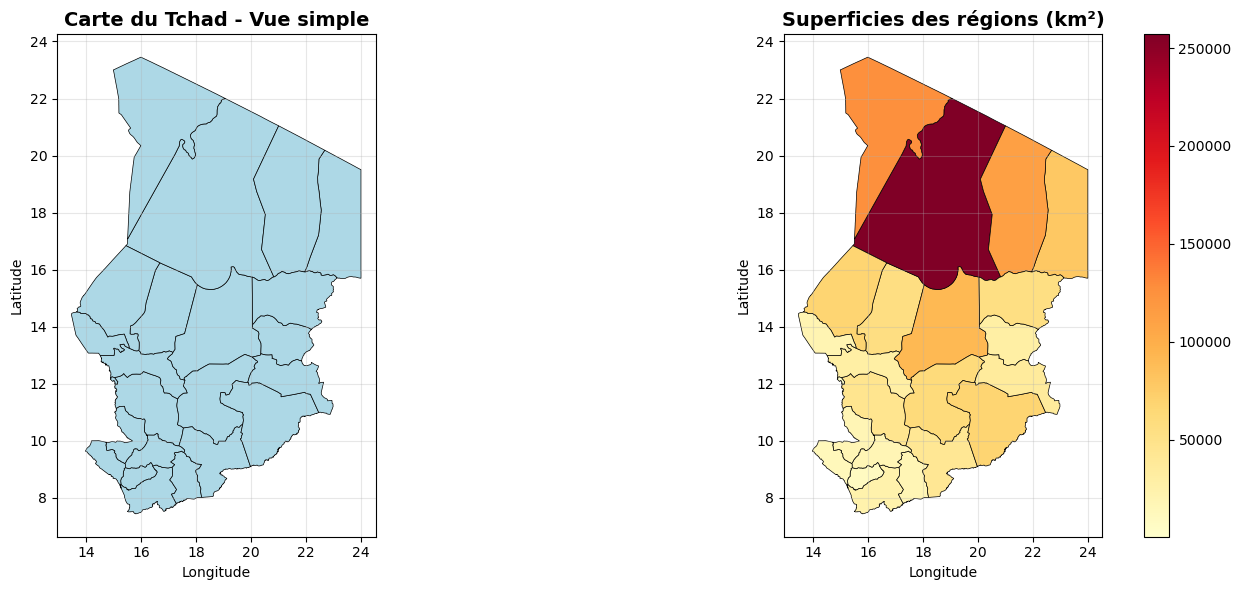


--- CHARGEMENT DES DONNÉES MALARIA ---
✓ Données malaria chargées: 1725 enregistrements

Colonnes disponibles:
['ISO3', 'National Unit', 'Name', 'Admin Level', 'Metric', 'Units', 'Year', 'Value']

Colonnes après nettoyage:
['ISO3', 'National Unit', 'Name', 'Admin Level', 'Metric', 'Units', 'Year', 'Value']

Aperçu des données:
  ISO3 National Unit             Name Admin Level          Metric  \
0  TCD          Chad  Logone Oriental      admin1  Incidence Rate   
1  TCD          Chad  Logone Oriental      admin1  Incidence Rate   
2  TCD          Chad  Logone Oriental      admin1  Incidence Rate   
3  TCD          Chad  Logone Oriental      admin1  Incidence Rate   
4  TCD          Chad  Logone Oriental      admin1  Incidence Rate   
5  TCD          Chad  Logone Oriental      admin1  Incidence Rate   
6  TCD          Chad  Logone Oriental      admin1  Incidence Rate   
7  TCD          Chad  Logone Oriental      admin1  Incidence Rate   
8  TCD          Chad  Logone Oriental      admin1

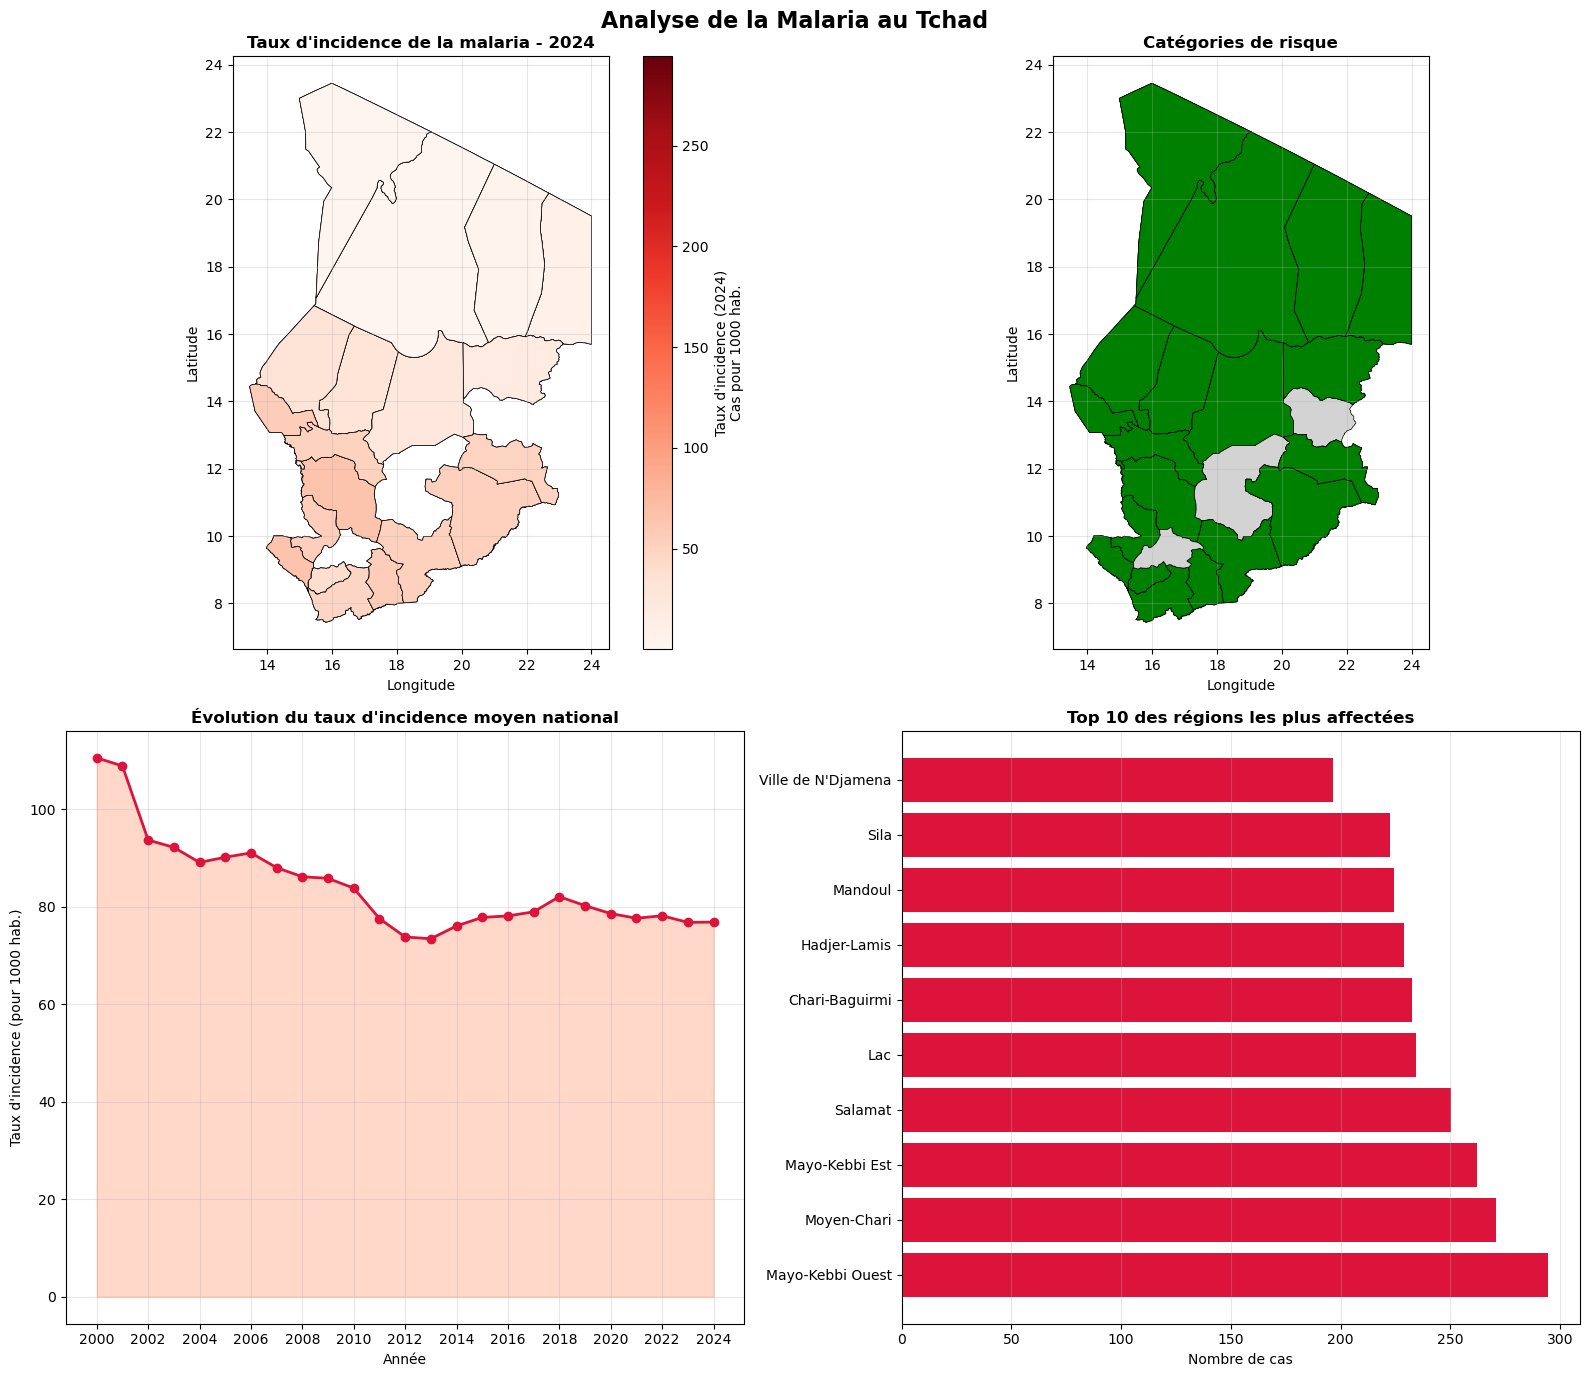

In [13]:
print("\n" + "="*70)
print("PARTIE 2: VISUALISATION ET TRAITEMENT DES DONNÉES")
print("="*70)

if gdf_tchad is not None:
    
    # -----------------------------------------------------------------------------
    # 2.1 Visualisation de base
    # -----------------------------------------------------------------------------
    
    print("\n--- VISUALISATION DE BASE ---")
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Carte simple
    gdf_tchad.plot(ax=axes[0], color='lightblue', edgecolor='black', linewidth=0.5)
    axes[0].set_title('Carte du Tchad - Vue simple', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Longitude')
    axes[0].set_ylabel('Latitude')
    axes[0].grid(True, alpha=0.3)
    
    # Carte avec superficies
    gdf_tchad.plot(column='superficie_km2', ax=axes[1], cmap='YlOrRd', 
                   legend=True, edgecolor='black', linewidth=0.5)
    axes[1].set_title('Superficies des régions (km²)', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Longitude')
    axes[1].set_ylabel('Latitude')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('carte_tchad_base.png', dpi=300, bbox_inches='tight')
    print("✓ Carte de base sauvegardée: 'carte_tchad_base.png'")
    plt.show()
    
    # -----------------------------------------------------------------------------
    # 2.2 Chargement et jointure des données de malaria
    # -----------------------------------------------------------------------------
    
    print("\n--- CHARGEMENT DES DONNÉES MALARIA ---")
    
    try:
        # Chargement des données de malaria (Excel ou CSV)
        if malaria_data_path.endswith('.xlsx') or malaria_data_path.endswith('.xls'):
            df_malaria = pd.read_excel(malaria_data_path)
        else:
            df_malaria = pd.read_csv(malaria_data_path)
        
        print(f"✓ Données malaria chargées: {len(df_malaria)} enregistrements")
        print(f"\nColonnes disponibles:")
        print(df_malaria.columns.tolist())
        
        # Nettoyage des noms de colonnes (enlever espaces)
        df_malaria.columns = df_malaria.columns.str.strip()
        print(f"\nColonnes après nettoyage:")
        print(df_malaria.columns.tolist())
        
        print(f"\nAperçu des données:")
        print(df_malaria.head(10))
        
        # Vérification de l'existence des colonnes nécessaires
        colonnes_requises = ['Name', 'Year', 'Value']
        colonnes_manquantes = [col for col in colonnes_requises if col not in df_malaria.columns]
        
        if colonnes_manquantes:
            raise KeyError(f"Colonnes manquantes: {colonnes_manquantes}. Colonnes disponibles: {df_malaria.columns.tolist()}")
        
        # Exploration de la structure des données
        print("\n--- STRUCTURE DES DONNÉES MALARIA ---")
        print(f"Années disponibles: {sorted(df_malaria['Year'].unique())}")
        print(f"Régions uniques: {df_malaria['Name'].nunique()}")
        print(f"Régions: {df_malaria['Name'].unique()[:5]}...")  # Affiche les 5 premières
        
        # Sélection de l'année la plus récente pour la visualisation principale
        annee_recente = df_malaria['Year'].max()
        print(f"\nAnnée sélectionnée pour la visualisation: {annee_recente}")
        
        # Filtrer les données pour l'année la plus récente
        df_malaria_recent = df_malaria[df_malaria['Year'] == annee_recente].copy()
        
        # Nettoyage des noms de régions (enlever espaces superflus)
        df_malaria_recent['Name'] = df_malaria_recent['Name'].str.strip()
        gdf_tchad['NAME_1'] = gdf_tchad['NAME_1'].str.strip()
        
        print(f"\n--- VÉRIFICATION DES CORRESPONDANCES ---")
        print(f"\nRégions dans le shapefile ({len(gdf_tchad)}):")
        for i, nom in enumerate(sorted(gdf_tchad['NAME_1'].tolist()), 1):
            print(f"  {i:2d}. {nom}")
        
        print(f"\nRégions dans les données malaria ({df_malaria_recent['Name'].nunique()}):")
        for i, nom in enumerate(sorted(df_malaria_recent['Name'].unique().tolist()), 1):
            print(f"  {i:2d}. {nom}")
        
        # Dictionnaire de correspondance pour les noms différents
        # IMPORTANT: Ajustez ce dictionnaire selon vos données réelles
        correspondance_noms = {
            'Logone Orien': 'Logone Oriental',  # Nom tronqué dans Excel
            'Logone Occide': 'Logone Occidental',
            'Mayo-Kebbi Ou': 'Mayo-Kebbi Ouest',
            # Ajoutez d'autres correspondances si nécessaire
        }
        
        # Application de la correspondance
        df_malaria_recent['Name_Clean'] = df_malaria_recent['Name'].replace(correspondance_noms)
        
        print(f"\n--- APRÈS NETTOYAGE ---")
        print("Correspondances appliquées:")
        for old, new in correspondance_noms.items():
            if old in df_malaria_recent['Name'].values:
                print(f"  '{old}' → '{new}'")
        
        # Jointure des données
        gdf_malaria = gdf_tchad.merge(df_malaria_recent, 
                                       left_on='NAME_1',  # Colonne du shapefile
                                       right_on='Name_Clean',    # Colonne nettoyée du CSV
                                       how='left')
        
        col_cas_malaria = 'Value'  # Colonne contenant le taux d'incidence
        
        # Vérification de la qualité de la jointure
        regions_sans_donnees = gdf_malaria[gdf_malaria['Value'].isna()]['NAME_1'].tolist()
        if regions_sans_donnees:
            print(f"\n⚠ ATTENTION: {len(regions_sans_donnees)} région(s) sans données:")
            for reg in regions_sans_donnees:
                print(f"  - {reg}")
            print("\n💡 Vérifiez les noms dans le dictionnaire 'correspondance_noms'")
        else:
            print(f"\n✓ Toutes les régions ont des données!")
        
        print(f"\n✓ Jointure effectuée avec succès!")
        print(f"  {len(gdf_malaria)} régions avec données combinées")
        print(f"  {gdf_malaria['Value'].notna().sum()} régions avec valeurs de malaria")
        
    except Exception as e:
        print(f"⚠ Erreur lors du chargement des données malaria: {e}")
    
    # -----------------------------------------------------------------------------
    # 2.3 Visualisation des données de malaria
    # -----------------------------------------------------------------------------
    
    print("\n--- VISUALISATION DES DONNÉES MALARIA ---")
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 14))
    fig.suptitle('Analyse de la Malaria au Tchad', fontsize=16, fontweight='bold')
    
    # Carte 1: Taux d'incidence
    gdf_malaria.plot(column=col_cas_malaria, ax=axes[0, 0], 
                     cmap='Reds', legend=True,
                     edgecolor='black', linewidth=0.5,
                     legend_kwds={'label': f'Taux d\'incidence ({annee_recente})\nCas pour 1000 hab.'})
    axes[0, 0].set_title(f'Taux d\'incidence de la malaria - {annee_recente}', 
                         fontsize=12, fontweight='bold')
    axes[0, 0].set_xlabel('Longitude')
    axes[0, 0].set_ylabel('Latitude')
    axes[0, 0].grid(True, alpha=0.3)
    
   # Carte 2: Catégories de risque
   # Créer une copie pour éviter les problèmes
gdf_malaria['categorie_risque'] = 'Pas de données'  # Initialiser avec valeur par défaut

   # Catégoriser uniquement les valeurs non-nulles
mask_valid = gdf_malaria[col_cas_malaria].notna()
if mask_valid.sum() > 0:
     gdf_malaria.loc[mask_valid, 'categorie_risque'] = pd.cut(
        gdf_malaria.loc[mask_valid, col_cas_malaria], 
        bins=4, 
        labels=['Faible', 'Moyen', 'Élevé', 'Très élevé']
     ).astype(str)

colors = {'Faible': 'green', 'Moyen': 'yellow', 'Élevé': 'orange', 
          'Très élevé': 'red', 'Pas de données': 'lightgray'}

gdf_malaria.plot(column='categorie_risque', ax=axes[0, 1],
                 categorical=True, legend=True,
                 edgecolor='black', linewidth=0.5,
                 color=[colors.get(str(cat), 'lightgray') for cat in gdf_malaria['categorie_risque']])
axes[0, 1].set_title('Catégories de risque', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Longitude')
axes[0, 1].set_ylabel('Latitude')
axes[0, 1].grid(True, alpha=0.3)
    
    # Graphique 3: Évolution temporelle
    # Calculer la moyenne nationale par année
evolution = df_malaria.groupby('Year')['Value'].mean().reset_index()
    
axes[1, 0].plot(evolution['Year'], evolution['Value'], 
                    marker='o', linewidth=2, markersize=6, color='crimson')
axes[1, 0].fill_between(evolution['Year'], evolution['Value'], alpha=0.3, color='coral')
axes[1, 0].set_title('Évolution du taux d\'incidence moyen national', 
                         fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Année')
axes[1, 0].set_ylabel('Taux d\'incidence (pour 1000 hab.)')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xticks(evolution['Year'][::2])  # Afficher une année sur deux
    
    # Graphique 4: Top 10 des régions
top_regions = gdf_malaria.nlargest(10, col_cas_malaria)
axes[1, 1].barh(range(len(top_regions)), top_regions[col_cas_malaria], color='crimson')
axes[1, 1].set_yticks(range(len(top_regions)))
axes[1, 1].set_yticklabels(top_regions['NAME_1'] if 'NAME_1' in top_regions.columns else range(len(top_regions)))
axes[1, 1].set_title('Top 10 des régions les plus affectées', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Nombre de cas')
axes[1, 1].grid(True, alpha=0.3, axis='x')
    
plt.tight_layout()
plt.savefig('analyse_malaria_tchad.png', dpi=300, bbox_inches='tight')
print("✓ Visualisation complète sauvegardée: 'analyse_malaria_tchad.png'")
plt.show()

### 2.4 Statistiques sur la malaria

In [87]:
print("\n--- STATISTIQUES SUR LA MALARIA ---")
print(f"Année analysée: {annee_recente}")
print(f"Taux d'incidence moyen: {gdf_malaria[col_cas_malaria].mean():.2f} cas/1000 hab.")
print(f"Médiane: {gdf_malaria[col_cas_malaria].median():.2f} cas/1000 hab.")
print(f"Écart-type: {gdf_malaria[col_cas_malaria].std():.2f}")
print(f"Min: {gdf_malaria[col_cas_malaria].min():.2f} cas/1000 hab.")
print(f"Max: {gdf_malaria[col_cas_malaria].max():.2f} cas/1000 hab.")
print(f"\nRégion la plus affectée: {gdf_malaria.loc[gdf_malaria[col_cas_malaria].idxmax(), 'NAME_1']}")
print(f"Taux d'incidence: {gdf_malaria[col_cas_malaria].max():.2f} cas/1000 hab.")
    
    # Statistiques temporelles
print("\n--- ÉVOLUTION TEMPORELLE (MOYENNE NATIONALE) ---")
print(f"Première année: {df_malaria['Year'].min()}")
print(f"Dernière année: {df_malaria['Year'].max()}")
taux_initial = df_malaria[df_malaria['Year'] == df_malaria['Year'].min()]['Value'].mean()
taux_final = df_malaria[df_malaria['Year'] == df_malaria['Year'].max()]['Value'].mean()
evolution_pct = ((taux_final - taux_initial) / taux_initial) * 100
print(f"Taux initial ({df_malaria['Year'].min()}): {taux_initial:.2f} cas/1000 hab.")
print(f"Taux final ({df_malaria['Year'].max()}): {taux_final:.2f} cas/1000 hab.")
print(f"Évolution: {evolution_pct:+.1f}%")


--- STATISTIQUES SUR LA MALARIA ---
Année analysée: 2024
Taux d'incidence moyen: 75.86 cas/1000 hab.
Médiane: 30.83 cas/1000 hab.
Écart-type: 89.57
Min: 0.03 cas/1000 hab.
Max: 294.35 cas/1000 hab.

Région la plus affectée: Mayo-Kebbi Ouest
Taux d'incidence: 294.35 cas/1000 hab.

--- ÉVOLUTION TEMPORELLE (MOYENNE NATIONALE) ---
Première année: 2000
Dernière année: 2024
Taux initial (2000): 110.58 cas/1000 hab.
Taux final (2024): 76.87 cas/1000 hab.
Évolution: -30.5%


### 2.5 Export des résultats

In [88]:
 print("\n--- EXPORT DES RÉSULTATS ---")
    
    # Export en shapefile
output_shapefile = "tchad_malaria_analyse.shp"
gdf_malaria.to_file(output_shapefile)
print(f"✓ Shapefile exporté: '{output_shapefile}'")
    
    # Export en GeoJSON
output_geojson = "tchad_malaria_analyse.geojson"
gdf_malaria.to_file(output_geojson, driver='GeoJSON')
print(f"✓ GeoJSON exporté: '{output_geojson}'")
    
    # Export des statistiques en CSV
stats_df = gdf_malaria[[col for col in gdf_malaria.columns if col != 'geometry']].copy()
stats_df.to_csv("statistiques_malaria.csv", index=False, encoding='utf-8')
print(f"✓ Statistiques exportées: 'statistiques_malaria.csv'")


--- EXPORT DES RÉSULTATS ---
✓ Shapefile exporté: 'tchad_malaria_analyse.shp'
✓ GeoJSON exporté: 'tchad_malaria_analyse.geojson'
✓ Statistiques exportées: 'statistiques_malaria.csv'


### Création d'un rapport HTML simple

In [89]:
html_report = f"""
    <html>
    <head>
        <title>Rapport Malaria - Tchad</title>
        <style>
            body {{ font-family: Arial, sans-serif; margin: 40px; }}
            h1 {{ color: #2c3e50; }}
            table {{ border-collapse: collapse; width: 100%; }}
            th, td {{ border: 1px solid #ddd; padding: 8px; text-align: left; }}
            th {{ background-color: #3498db; color: white; }}
        </style>
    </head>
    <body>
        <h1>Rapport d'Analyse - Malaria au Tchad</h1>
        <h2>Statistiques générales</h2>
        <p>Total de cas: {gdf_malaria[col_cas_malaria].sum():,.0f}</p>
        <p>Moyenne par région: {gdf_malaria[col_cas_malaria].mean():,.2f}</p>
        <h2>Régions les plus affectées</h2>
        <table>
            <tr><th>Région</th><th>Cas</th><th>Catégorie</th></tr>
    """
    
for _, row in gdf_malaria.nlargest(10, col_cas_malaria).iterrows():
    html_report += f"<tr><td>{row.get('NAME_1', 'N/A')}</td><td>{row[col_cas_malaria]:,.0f}</td><td>{row['categorie_risque']}</td></tr>\n"
    
    html_report += """
        </table>
    </body>
    </html>
    """
    
    with open("rapport_malaria.html", "w", encoding='utf-8') as f:
        f.write(html_report)
    print(f"✓ Rapport HTML généré: 'rapport_malaria.html'")

✓ Rapport HTML généré: 'rapport_malaria.html'
✓ Rapport HTML généré: 'rapport_malaria.html'
✓ Rapport HTML généré: 'rapport_malaria.html'
✓ Rapport HTML généré: 'rapport_malaria.html'
✓ Rapport HTML généré: 'rapport_malaria.html'
✓ Rapport HTML généré: 'rapport_malaria.html'
✓ Rapport HTML généré: 'rapport_malaria.html'
✓ Rapport HTML généré: 'rapport_malaria.html'
✓ Rapport HTML généré: 'rapport_malaria.html'
✓ Rapport HTML généré: 'rapport_malaria.html'


## CONCLUSION

In [ ]:
print("\n" + "="*70)
print("Fin de notre travail!")
print("="*70)


======================================================================
ANALYSE TERMINÉE AVEC SUCCÈS!
======================================================================

